In [104]:
import numpy as np
from fbm import fbm, times
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

I) Simulation of a rough volatility process 

In [134]:
nu,X0,alpha=0.3,-5,5*10**(-4)
m=X0

def log_vol(T,lag,H):
    delta=lag/252
    N=int(T/delta)
    X=np.zeros(N)
    X[0]=X0
    W = fbm(N-1, H, length=T, method='daviesharte')
    for i in range(len(W)-1):
        X[i+1]=X[i]+(W[i+1]-W[i])*nu+alpha*(m-X[i])*delta
    return(X)
def hist(d):
    plt.subplot(2, 2, 1)
    plt.hist(np.diff(d[::1]),100,label="1 lag",density=True)
    plt.xlabel("frequency")
    plt.ylabel("X-X0")
    plt.legend()
    plt.title("The distribution of the log-volatility increments for H = "+str(H))

    plt.subplot(2,2,2)
    plt.hist(np.diff(d[::5]),100,label="5 lag",density=True)
    plt.xlabel("frequency")
    plt.ylabel("X-X0")
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.hist(np.diff(d[::25]),100,label="25 lag",density=True)
    plt.xlabel("X")
    plt.ylabel("P(X-X0)")
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.hist(np.diff(d[::125]),100,label="125 lag",density=True)
    plt.xlabel("X")
    plt.ylabel("P(X-X0)")
    plt.legend()
    plt.show()

Distribution of log-volatility increments

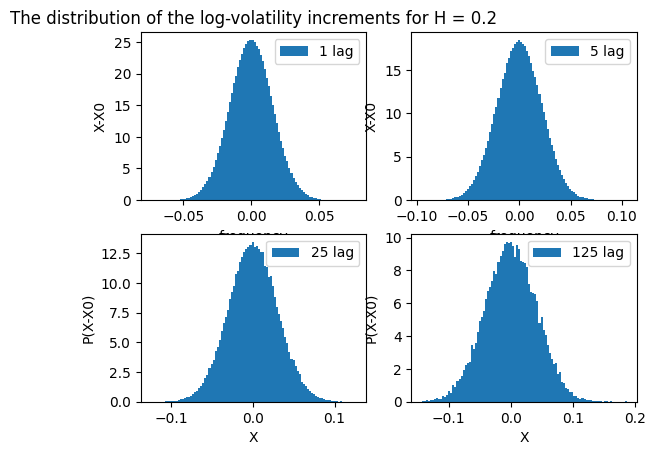

In [135]:
H=0.2 #~30 seconds to load
p=4
X=log_vol(1,10**-p,H)
hist(X)

In [66]:
nu,X0,alpha=0.3,-5,5*10**(-4)
m=X0

In [67]:
def log_vol(T,lag,H):
    N=int(252*T/lag)
    X=np.zeros(N)
    X[0]=X0
    W = fbm(N-1, H, length=T, method='daviesharte')
    for i in range(len(W)-1):
        X[i+1]=X[i]+(W[i+1]-W[i])*nu+alpha*(m-X[i])*lag/252
    return(X)

def M(X,q,lag):
    a=np.mean(abs(np.diff(X[::int(lag)]))**q)
    return(a)

def H_exp_model(h,nt):

    Delta=np.logspace(1,2.1,100)
    Q=[0.5,1,1.5,2,3]
    Y=np.zeros(len(Delta))
    
    h_exp=0
    for q in Q:
        i=0
        for d in Delta:
            Em=0
            for k in range(nt):
                X=log_vol(1,0.1,h) 
                Em+=M(X,q,d)
            Y[i]=Em/nt
            i+=1
        Y=np.log10(Y)
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Delta),Y)
        x=[1,2.1]
        y=[1*slope+intercept,2.1*slope+intercept]
        plt.plot(x,y)
        h_exp+=slope/q/len(Q)
        plt.scatter(np.log10(Delta),Y,marker=".",s=10)
    plt.title("H theoric = "+str(h)+", H experimental = "+str(h_exp))
    plt.xlabel(r"$\log(\Delta)$")
    plt.ylabel(r"$\log(m(q,\Delta))$")
    plt.show()




Scaling of the moments and monofractality


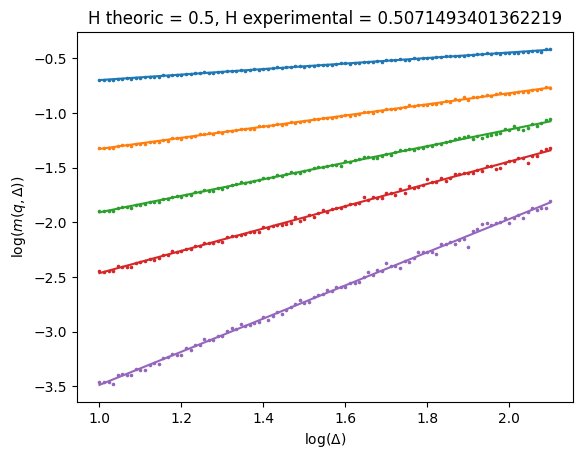

In [27]:
nt=500 #number of trajectory
 #~ 30secondes
H_exp_model(0.5,nt)


In [101]:
a=pd.read_csv("RealizedVarianceData.csv",skiprows=[0])
d=a["SPX2.rv"].tolist()
d=np.log10(d)
for k in range(len(d)):
    if str(d[k])=="nan":
        d[k]=d[k-1]
a["DateID"] = pd.to_datetime(a['DateID'],format='%Y%m%d')
a['year'] = pd.DatetimeIndex(a['DateID']).year
years = set(a["year"].values)
T=[]
for year in years:
    dyear= a[a["year"] == year]["SPX2.rv"].tolist()
    dyear=np.log10(dyear)
    for k in range(len(dyear)):
        if str(dyear[k])=="nan":
            dyear[k]=dyear[k-1]
    T.append(dyear)

    

In [119]:
def M(X,q,lag):
    a=np.mean(abs(np.diff(X[::int(lag)]))**q)
    return(a)

def H_exp(X,plot):
    Delta=np.logspace(1,2.1,100)
    Q=[0.5,0.75,1,1.25,1.5,2]
    Y=np.zeros(len(Delta))   
    h_exp=0
    for q in Q:
        i=0
        for d in Delta:   
            Em=M(X,q,d)
            Y[i]=Em
            i+=1
        Y=np.log10(Y)
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Delta),Y)
        x=[1,2.1]
        y=[1*slope+intercept,2.1*slope+intercept]
        plt.plot(x,y)
        h_exp+=slope/q/len(Q)
        plt.scatter(np.log10(Delta),Y,marker=".",s=10)
    plt.title("H experimental = "+str(h_exp))
    plt.xlabel(r"$\log(\Delta)$")
    plt.ylabel(r"$\log(m(q,\Delta))$")
    if plot:
        plt.show()
    else:
        plt.clf()
    return(h_exp)

def histo(X):
    plt.subplot(2, 2, 1)
    plt.hist(np.diff(X[::1]),30,label="1 lag",density=True)
    plt.xlabel("frequency")
    plt.ylabel("X")
    plt.legend()
    plt.title("The distribution of the log-volatility increments")

    plt.subplot(2,2,2)
    plt.hist(np.diff(X[::3]),30,label="3 lag",density=True)
    plt.xlabel("frequency")
    plt.ylabel("X")
    plt.legend()


    plt.subplot(2, 2, 3)
    plt.hist(np.diff(X[::10]),30,label="10 lag",density=True)
    plt.xlabel("frequency")
    plt.ylabel("X")
    plt.legend()


    plt.subplot(2, 2, 4)
    plt.hist(np.diff(X[::30]),30,label="30 lag",density=True)
    plt.xlabel("frequency")
    plt.ylabel("X")
    plt.legend()
    plt.show()

def moving_average(table,t,L):
    slice=table[t:L*260+t]
    return H_exp(slice,False)

Now with real data

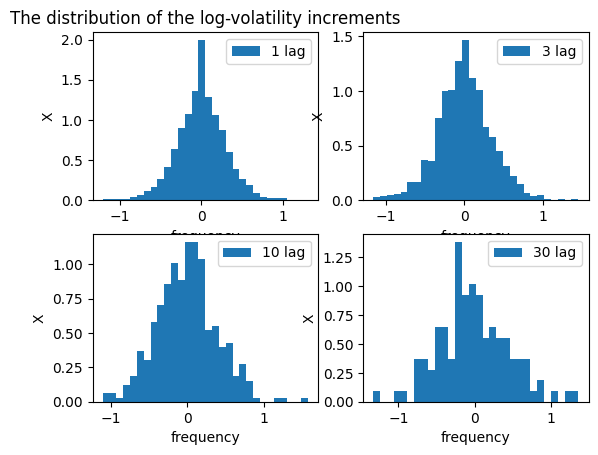

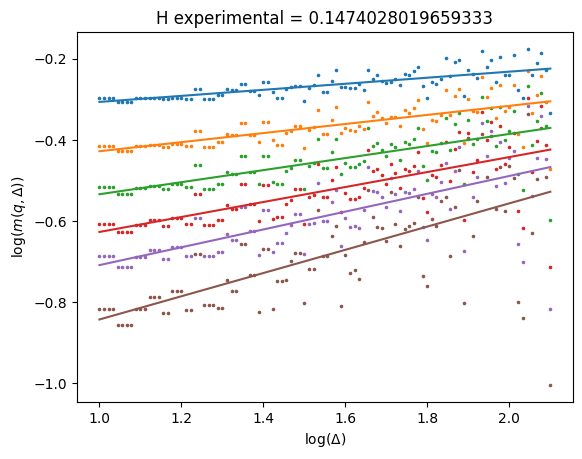

In [136]:
histo(d)
h_exp=H_exp(d,True)

In [124]:
H=0.147402801965937
X_simulated=log_vol(14,1,H)
#14 years
L=8
Delta=np.arange(0,(14-L)*260,10)
Y,Z=[],[]

for delta in Delta:
    Y.append(moving_average(d,int(delta),L))
    Z.append(moving_average(X_simulated,int(delta),L))

<Figure size 640x480 with 0 Axes>

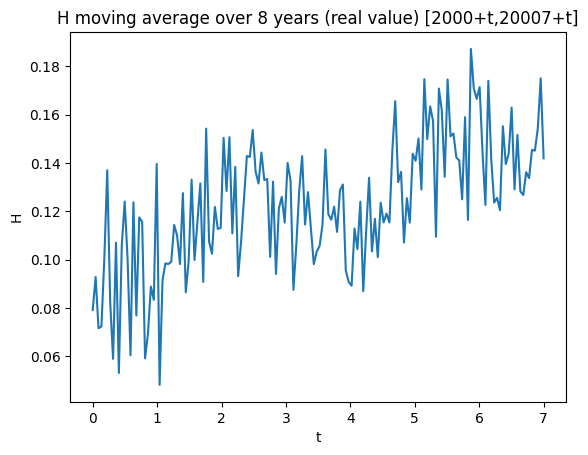

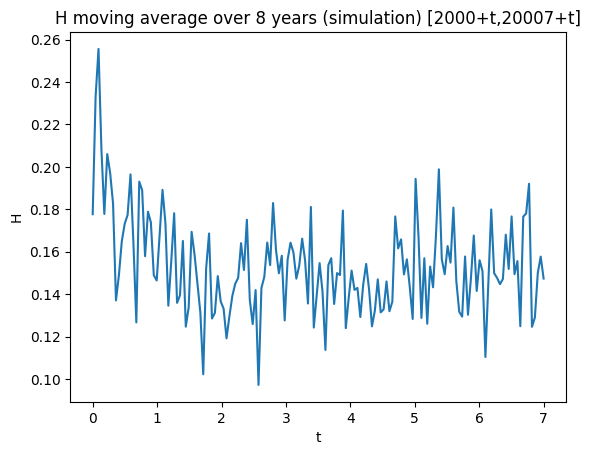

In [130]:
T=np.linspace(0,7,len(Y))

plt.title(f"H moving average over {L} years (real value) [2000+t,20007+t]")
plt.xlabel("t")
plt.ylabel("H")
plt.plot(T,Y)
plt.show()
plt.plot(T,Z)
plt.title(f"H moving average over {L} years (simulation) [2000+t,20007+t]")
plt.xlabel("t")
plt.ylabel("H")
plt.show()


In [128]:
def pred_sigma(log_sigmasquare,delta,H):
    pred = 0
    coeff=((delta**(H+1/2))*np.cos(H*np.pi)/np.pi)
    for k in range(len(log_sigmasquare)):
        d=(k+delta+1/2)*((k+1/2)**(H+1/2))
        a=log_sigmasquare[-k-1]/d
        pred+=a
    return(pred*coeff)

def P(delta):
    dtilde=d[delta:]
    X=np.array([pred_sigma(d[:k+1],delta,H) for k in range(len(d)-delta)]) #X[k]=log sigma [k+delta]
    bias=np.mean(dtilde/X)
    return(1-r2_score(dtilde,X*bias))

def plot(delta):
    dtilde=d[delta:]
    X=np.array([pred_sigma(d[:k+1],delta,H) for k in range(len(d)-delta)])
    plt.plot(dtilde,label="Real")
    plt.plot(X*np.mean(dtilde/X),label="Pred")
    plt.legend()
    plt.show()


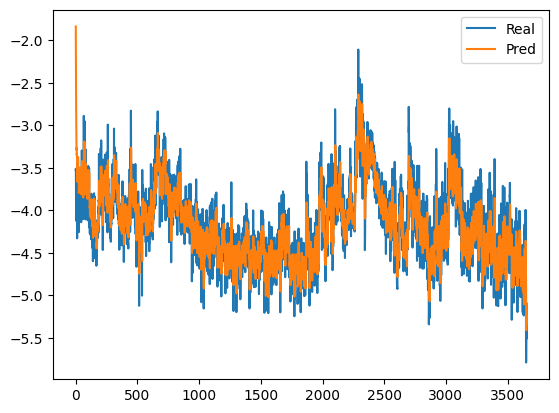

0.32013212738145524


In [133]:
plot(1)
print(P(1))

The P score obtained for $\Delta=1$ is 0.32 